In [1]:
from lightkurve import KeplerLightCurveFile, LightCurve, KeplerTargetPixelFile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astroquery.vizier import Vizier
import astropy.units as u
from astropy.stats import LombScargle
from astropy.convolution import Box2DKernel, convolve
from copy import deepcopy

In [2]:
ID = 211416749

/Users/JZ/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:907: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/JZ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


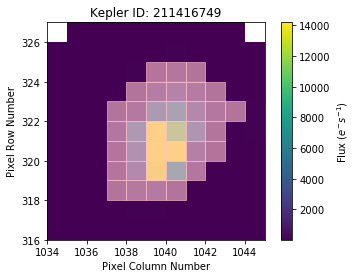

In [3]:
tpf = KeplerTargetPixelFile.from_archive(ID, campaign=5, cadence='short', quality_bitmask='hardest')
aper = np.nanmedian(tpf.flux, axis=0) > np.nanpercentile(np.nanmedian(tpf.flux, axis=0), 70)
tpf.plot(aperture_mask=aper)
lc1 = tpf.to_lightcurve().normalize().remove_nans().remove_outliers().correct(windows=20).remove_outliers()


In [4]:
lc1 = lc1.fill_nans()

/Users/JZ/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:907: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/JZ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


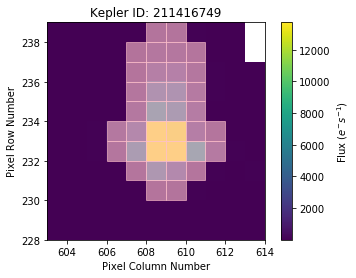

In [5]:
# The first ~3800 cadences have a large gap, it breaks our SFF detrender. Let's get rid of them.
tpf = KeplerTargetPixelFile.from_archive(ID, campaign=16, cadence='short', quality_bitmask='hardest')
aper = np.nanmedian(tpf.flux, axis=0) > np.nanpercentile(np.nanmedian(tpf.flux, axis=0), 70)
tpf.plot(aperture_mask=aper)
lc2 = tpf.to_lightcurve('all')[3800:].normalize().remove_nans().remove_outliers().correct(windows=20).remove_outliers()
lc2 = lc2.fill_nans()

In [6]:
%reload_ext autoreload
%autoreload 2

from lightkurve.periodogram import Periodogram

pd1 = Periodogram.from_lightcurve(lc1)
pd2 = Periodogram.from_lightcurve(lc2)

No KIC was found
No KIC was found


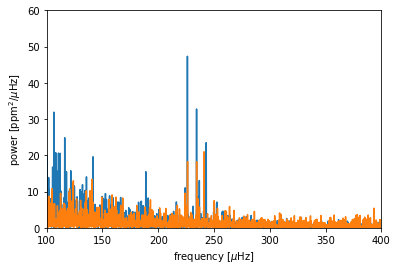

In [7]:
ax = pd1.plot()
ax.set_xlim(100, 400)
ax.set_ylim(0, 60)
pd2.plot(ax=ax)

No KIC was found


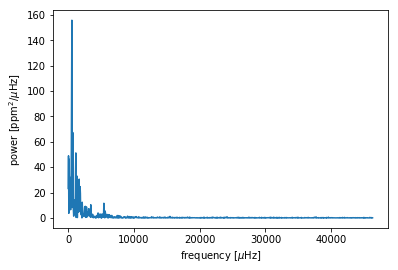

In [8]:
freq = np.linspace(1,4000, 1000) * u.hour
pd1.plot(freq)

In [9]:
lc1.Periodogram().plot()

AttributeError: 'LightCurve' object has no attribute 'Periodogram'